<a href="https://colab.research.google.com/github/MAbhutto/DSProjects/blob/main/EDA%20and%20prep%20for%20ML%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/content/drive/MyDrive/UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
#Empty purpose can mean a lot of things so need to fill them
df['PURPOSE'] = df['PURPOSE'].fillna("UNKNOWN")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Dealing with Outliers and Missing Values

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [7]:
df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


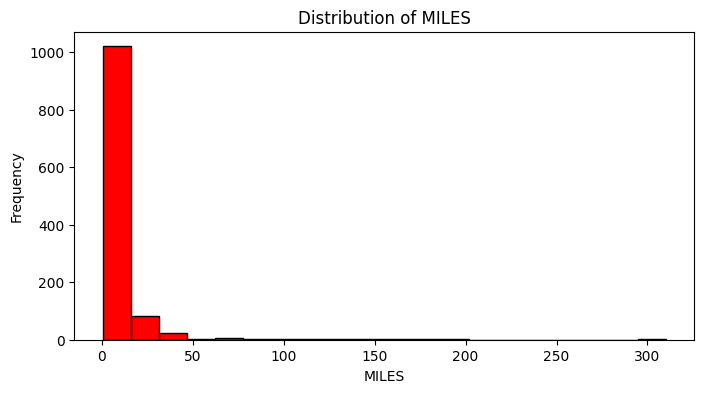

In [8]:
# Histogram of 'MILES'
plt.figure(figsize=(8, 4))
plt.hist(df['MILES'], bins=20, color='red', edgecolor='black')
plt.xlabel('MILES')
plt.ylabel('Frequency')
plt.title('Distribution of MILES')
plt.show()



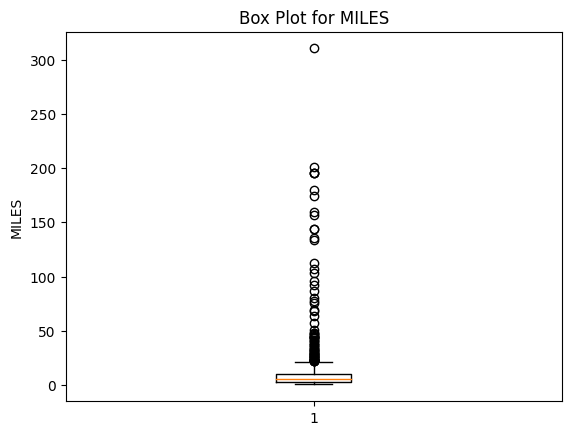

In [9]:
# Outlier Detection
# Box plot for 'MILES' to visualize outliers
plt.boxplot(df['MILES'], vert=True)
plt.ylabel('MILES')
plt.title('Box Plot for MILES')
plt.show()



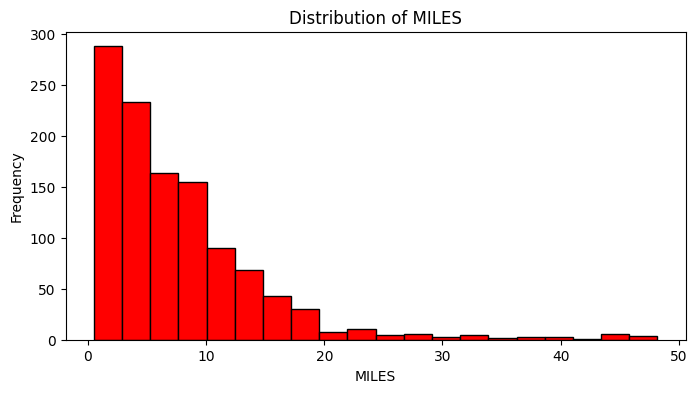

In [10]:
#Removing Outliers through intuitive range
df_filtered = df[df['MILES']<=50]
# Histogram of 'MILES' without outliers
plt.figure(figsize=(8, 4))
plt.hist(df_filtered['MILES'], bins=20, color='red', edgecolor='black')
plt.xlabel('MILES')
plt.ylabel('Frequency')
plt.title('Distribution of MILES')
plt.show()

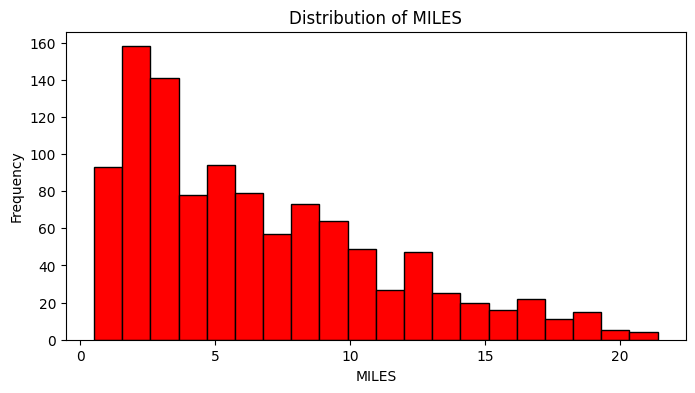

In [11]:
#Removing Outliers through IQR
Q1 = df['MILES'].quantile(0.25)
Q3 = df['MILES'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_IQR = df[(df['MILES'] >= lower_bound) & (df['MILES'] <= upper_bound)]

# Histogram of 'MILES' without outliers
plt.figure(figsize=(8, 4))
plt.hist(df_IQR['MILES'], bins=20, color='red', edgecolor='black')
plt.xlabel('MILES')
plt.ylabel('Frequency')
plt.title('Distribution of MILES')
plt.show()

In [12]:
#Removing outlier through z score (Most efficient as per my understanding)
z_scores = stats.zscore(df['MILES'])
df = df[(z_scores < 3)]

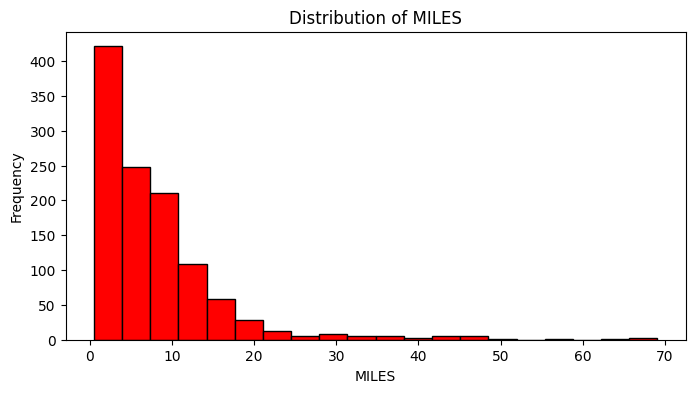

In [13]:
# Histogram of 'MILES' without outliers
plt.figure(figsize=(8, 4))
plt.hist(df['MILES'], bins=20, color='red', edgecolor='black')
plt.xlabel('MILES')
plt.ylabel('Frequency')
plt.title('Distribution of MILES')
plt.show()

# EDA

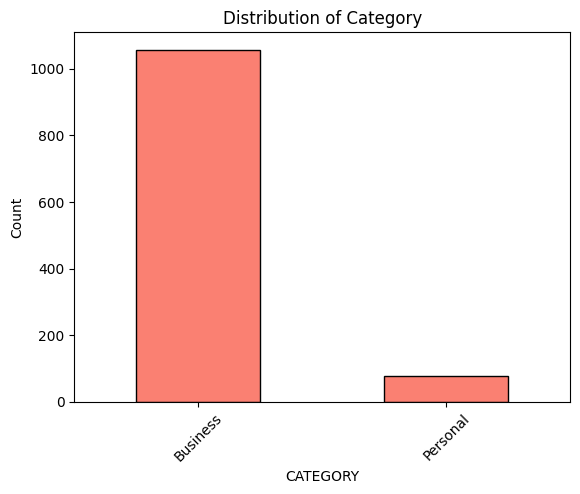

In [14]:
# Bar plot for 'CATEGORY'
df['CATEGORY'] = df['CATEGORY'].astype('category')
category_counts = df['CATEGORY'].value_counts()
category_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel('CATEGORY')
plt.ylabel('Count')
plt.title('Distribution of Category')
plt.xticks(rotation=45)
plt.show()



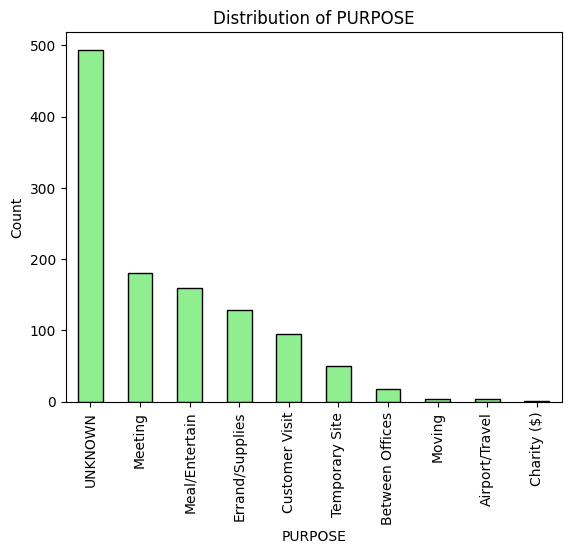

In [15]:
# Bar plot for 'PURPOSE'
purpose_counts = df['PURPOSE'].value_counts()
purpose_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('PURPOSE')
plt.ylabel('Count')
plt.title('Distribution of PURPOSE')
plt.show()



In [16]:
# Display unique values and frequency counts for 'CATEGORY' and 'PURPOSE'
print("Unique Categories:")
print(df['CATEGORY'].unique())
print("\nFrequency Counts for PURPOSE:")
print(purpose_counts)



Unique Categories:
['Business', 'Personal']
Categories (2, object): ['Business', 'Personal']

Frequency Counts for PURPOSE:
UNKNOWN            494
Meeting            180
Meal/Entertain     160
Errand/Supplies    128
Customer Visit      95
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Name: PURPOSE, dtype: int64


In [17]:
# converting START_DATE and END_DATE into datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

#Create new feature representing shift of the ride - morning, afternoon, evening, night
df['HOUR'] = df['START_DATE'].apply(lambda i : i.hour)
df['SHIFT'] = df['START_DATE'].apply(lambda i : i.hour)
df['SHIFT'] = pd.cut(x = df['SHIFT'], bins = [0, 6, 11, 17, 20, 24],
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

In [18]:
#Create new feature representing month of the ride
df['RIDE_MONTH'] = df['START_DATE'].apply(lambda i : i.month)
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df['RIDE_MONTH'] = df['RIDE_MONTH'].map(month_label)
#create new feature representing weekday of the ride
df['WEEKDAY'] = df['START_DATE'].apply(lambda i : i.weekday())
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['WEEKDAY'] = df['WEEKDAY'].map(day_label)

# duration of the ride
df['DURATION'] = (df['END_DATE'] - df['START_DATE']).astype('timedelta64[m]')


In [19]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,SHIFT,RIDE_MONTH,WEEKDAY,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Night,Jan,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed,67.0


In [20]:
df.describe()

,MILES,HOUR,DURATION
count,1133.000000,1133.000000,1133.000000
mean,7.985613,14.673433,20.626655
std,8.078931,4.575744,17.571486
min,0.500000,0.000000,0.000000
25%,2.800000,12.000000,10.000000
50%,5.800000,15.000000,16.000000
75%,10.300000,18.000000,26.000000
max,69.100000,23.000000,167.000000


In [21]:
print('Min Timestamp in START_TIME is - {}'.format(df['START_DATE'].min()))
print('Max Timestamp in START_TIME is - {}'.format(df['START_DATE'].max()))

Min Timestamp in START_TIME is - 2016-01-01 21:11:00
Max Timestamp in START_TIME is - 2016-12-31 22:08:00


In [22]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].nunique()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].nunique()))
print("Total number of unique location in START - {}".format(df['START'].nunique()))
print("Total number of unique location in STOP - {}".format(df['STOP'].nunique()))

Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 10
Total number of unique location in START - 168
Total number of unique location in STOP - 179


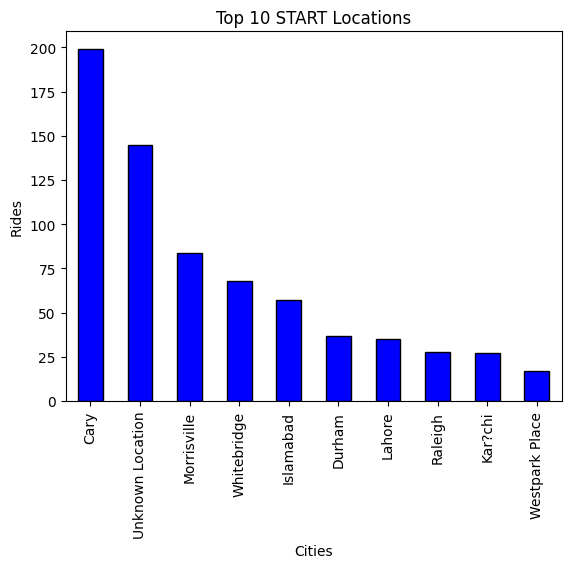

In [23]:
# Top 10 locations for START
start = df['START'].value_counts().nlargest(10)
start.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Cities')
plt.ylabel('Rides')
plt.title('Top 10 START Locations')

plt.show()

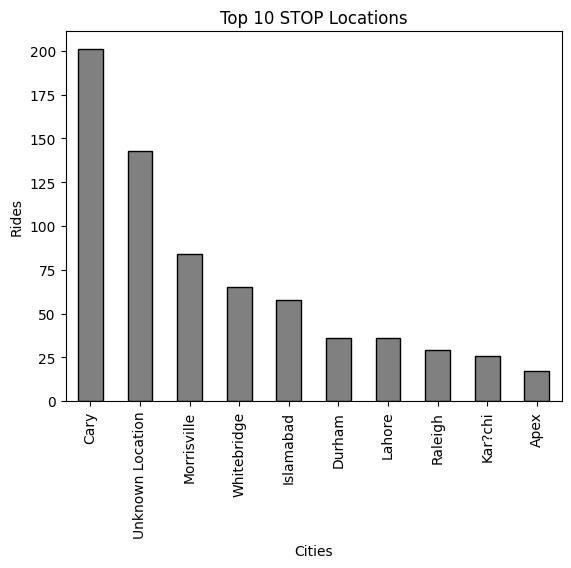

In [24]:
stop = df['STOP'].value_counts().nlargest(10)
stop.plot(kind='bar', color='grey', edgecolor='black')
plt.xlabel('Cities')
plt.ylabel('Rides')
plt.title('Top 10 STOP Locations')

plt.show()

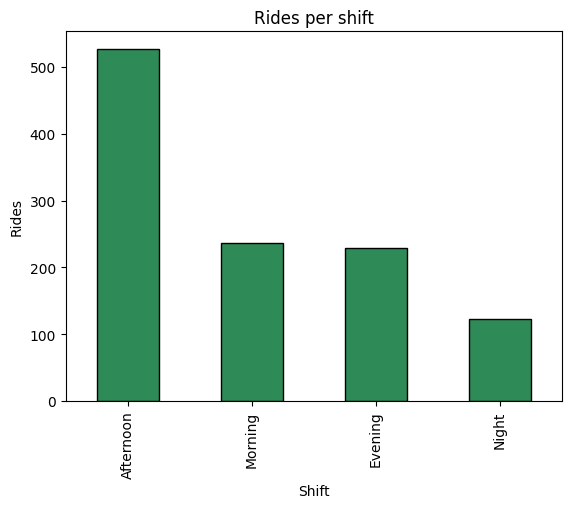

In [25]:
df['SHIFT'] = df['SHIFT'].astype('category')
shift = df['SHIFT'].value_counts()
shift.plot(kind='bar', color='seagreen', edgecolor = 'black')
plt.xlabel('Shift')
plt.ylabel('Rides')
plt.title('Rides per shift')

plt.show()


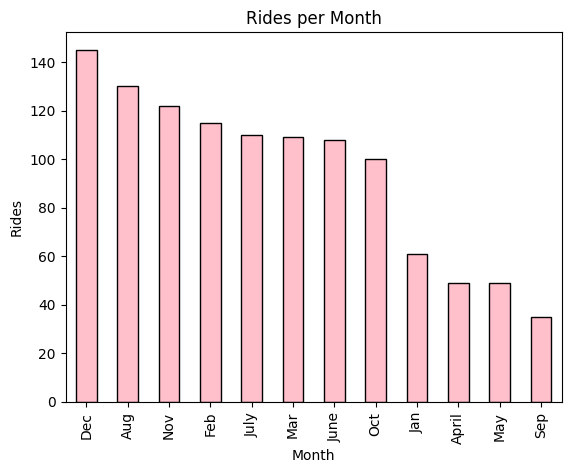

In [26]:
df['RIDE_MONTH'] = df['RIDE_MONTH'].astype('category')
shift = df['RIDE_MONTH'].value_counts()
shift.plot(kind='bar', color='pink', edgecolor = 'black')
plt.xlabel('Month')
plt.ylabel('Rides')
plt.title('Rides per Month')

plt.show()

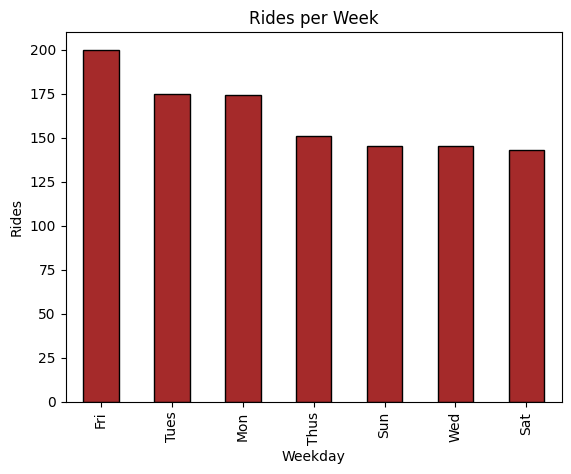

In [27]:
df['WEEKDAY'] = df['WEEKDAY'].astype('category')
shift = df['WEEKDAY'].value_counts()
shift.plot(kind='bar', color='brown', edgecolor = 'black')
plt.xlabel('Weekday')
plt.ylabel('Rides')
plt.title('Rides per Week')

plt.show()

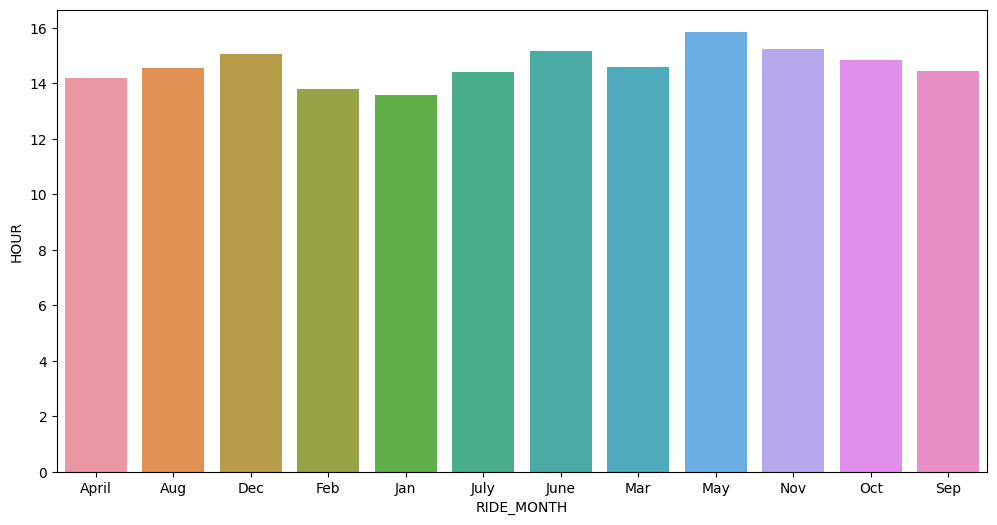

In [28]:
plt.figure(figsize=(12, 6))
temp = df.groupby('RIDE_MONTH')['HOUR'].mean().reset_index()
sns.barplot(x='RIDE_MONTH', y='HOUR', data=temp)
plt.show()

In [29]:
duplicate_rows = df[df.duplicated(keep=False)]
print("Duplicate Rows:")
duplicate_rows


Duplicate Rows:


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,SHIFT,RIDE_MONTH,WEEKDAY,DURATION
491,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Durham,Cary,9.9,Meeting,23,Night,June,Tues,25.0
492,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Durham,Cary,9.9,Meeting,23,Night,June,Tues,25.0


In [30]:
pd.crosstab(df['RIDE_MONTH'], [df['SHIFT'], df['CATEGORY']], rownames=['MONTH'], colnames=['SHIFT', 'CATEGORY'])

SHIFT    Afternoon           Evening           Morning             Night  \
CATEGORY  Business Personal Business Personal Business Personal Business   
MONTH                                                                      
April           24        1        8        0        8        2        5   
Aug             73        0       23        0       27        0        7   
Dec             65        0       35        0       27        0       16   
Feb             54        6       16        2       22        9        4   
Jan             37        0        5        0       14        0        4   
July            29       14       18        3       19        6       12   
June            39        1       20        0       22        0       24   
Mar             33       11       18        9       21        2        8   
May             24        0        7        0        4        0       13   
Nov             64        0       26        0       22        0       10   
Oct             39        0       30        0       20        0        9   
Sep             13        0        9        0       11        0        2   

SHIFT              
CATEGORY Personal  
MONTH              
April           0  
Aug             0  
Dec             0  
Feb             1  
Jan             0  
July            2  
June            0  
Mar             5  
May             0  
Nov             0  
Oct             0  
Sep             0

# Preparing Data for ML Model

In [31]:
#On-hot encoding of category and purpose. I don't think this would be relevant in scope of this data. We only need to predict miles
df_encoded = pd.get_dummies(df, columns=['CATEGORY', 'PURPOSE'], drop_first=True)
df_encoded

,START_DATE,END_DATE,START,STOP,MILES,HOUR,SHIFT,RIDE_MONTH,WEEKDAY,DURATION,CATEGORY_Personal,PURPOSE_Between Offices,PURPOSE_Charity ($),PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Moving,PURPOSE_Temporary Site,PURPOSE_UNKNOWN
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,21,Night,Jan,Fri,6.0,0,0,0,0,0,1,0,0,0,0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Fort Pierce,Fort Pierce,5.0,1,Night,Jan,Sat,12.0,0,0,0,0,0,0,0,0,0,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,20,Evening,Jan,Sat,13.0,0,0,0,0,1,0,0,0,0,0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,17,Afternoon,Jan,Tues,14.0,0,0,0,0,0,0,1,0,0,0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,14,Afternoon,Jan,Wed,67.0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Kar?chi,Kar?chi,0.7,1,Night,Dec,Sat,7.0,0,0,0,0,0,0,1,0,0,0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Kar?chi,Unknown Location,3.9,13,Afternoon,Dec,Sat,18.0,0,0,0,0,0,0,0,0,1,0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Unknown Location,Unknown Location,16.2,15,Afternoon,Dec,Sat,35.0,0,0,0,0,0,0,1,0,0,0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Katunayake,Gampaha,6.4,21,Night,Dec,Sat,18.0,0,0,0,0,0,0,0,0,1,0


<ipython-input-33-b09364cbdb59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


Correlation Matrix:


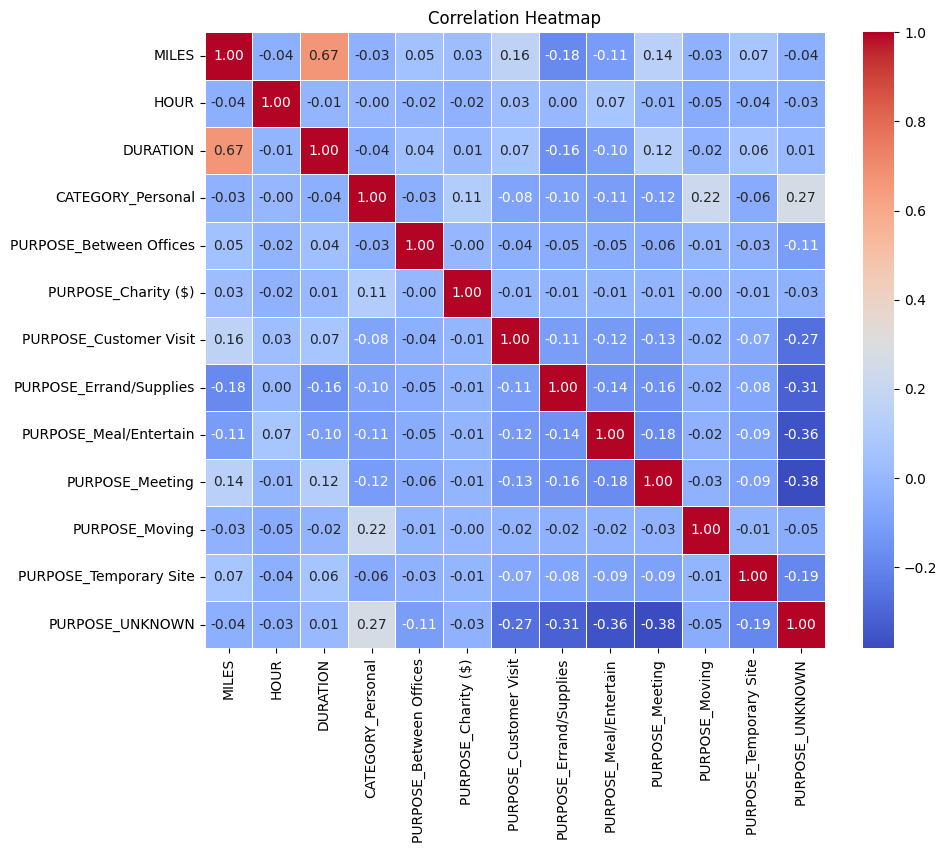

In [33]:
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print("Correlation Matrix:")
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Split the data into a training set and a testing set
X = df.drop('MILES', axis=1)  # Features (all columns except 'MILES')
y = df['MILES']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 4: Feature Scaling (if needed)
# Standardize numerical features to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train

,START_DATE,END_DATE,CATEGORY,START,STOP,PURPOSE,HOUR,SHIFT,RIDE_MONTH,WEEKDAY,DURATION
79,2016-02-07 16:49:00,2016-02-07 17:01:00,Business,Cary,Apex,Errand/Supplies,16,Afternoon,Feb,Sun,12.0
237,2016-03-17 21:48:00,2016-03-17 22:04:00,Personal,Sharpstown,Midtown,UNKNOWN,21,Night,Mar,Thus,16.0
213,2016-03-11 11:57:00,2016-03-11 12:04:00,Business,Downtown,Red River District,UNKNOWN,11,Morning,Mar,Fri,7.0
264,2016-03-23 14:37:00,2016-03-23 14:42:00,Personal,Whitebridge,Preston,UNKNOWN,14,Afternoon,Mar,Wed,5.0
653,2016-08-12 18:49:00,2016-08-12 18:52:00,Business,Whitebridge,Westpark Place,UNKNOWN,18,Evening,Aug,Fri,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1003,2016-11-26 19:47:00,2016-11-26 19:54:00,Business,Cary,Cary,Errand/Supplies,19,Evening,Nov,Sat,7.0
619,2016-08-01 17:23:00,2016-08-01 17:55:00,Business,Morrisville,Cary,UNKNOWN,17,Afternoon,Aug,Mon,32.0
115,2016-02-16 17:17:00,2016-02-16 17:26:00,Business,Colombo,Nugegoda,Meal/Entertain,17,Afternoon,Feb,Tues,9.0
219,2016-03-13 18:23:00,2016-03-13 18:43:00,Business,South Congress,North Austin,Meal/Entertain,18,Evening,Mar,Sun,20.0
